# Example: Fun with the Assignment Problem
This example will familiarize students with formulating and solving the assignment problem for different values of problem parameters. The assignment problem is a type of [minimum flow problem](https://en.wikipedia.org/wiki/Minimum-cost_flow_problem) in which items in a set, e.g., people, are matched with items in another set, e.g., jobs such that the minimum cost is achieved.

## Setup
This example requires several external libraries and a function to compute the outer product. Let's download and install these packages and call our `Include.jl` file.

In [1]:
include("Include.jl");

  Activating project at `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-12/L12c`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-12/L12c/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-12/L12c/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-12/L12c/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-12/L12c/Manifest.toml`


## Prerequisites 
Before exploring the assignment problem, let's specify the paths to the edge files we will load. The `base_edgefile` variable will hold the path to that balanced case, i.e., the number of jobs $n$ equals the number of people $m$. The `unbalanced_edgefile` variable holds the path to an unbalanced case, where the number of people $n$ is less than the number of jobs $m$, i.e., $n<m$. Both edge 

In [2]:
base_edgefile = joinpath(_PATH_TO_DATA, "Bipartite.edgelist");
unbalanced_edgefile = joinpath(_PATH_TO_DATA, "Unbalanced-bipartite.edgelist");

## Solve the `balanced` primal problem: match $n$ people to $m$ jobs where $n=m$.
In the balanced problem, we minimize the overall cost of matching people to jobs where the number of people and jobs are the same. To solve this problem, we load the edgefile using the `readedgesfile(...)` function, which takes the `path_to_edge_file` variable as an argument and returns a dictionary of edges. 
* We use the [Julia |> operator](https://docs.julialang.org/en/v1/base/base/#Base.:|%3E) to pass the edge dictionary (as the temporary variable name `edges`) to a `build(...)`, which constructs and `MySimpleDirectedGraphModel` from the edge dictionary. We save the graph model corresponding to the balanced graph ($n=m$) in the `base_graphmodel` variable.

In [3]:
base_graphmodel = readedgesfile(base_edgefile) |> edges -> build(MySimpleDirectedGraphModel, edges); # wow - this is ammaaazing!

In [4]:
base_graphmodel.edges

Dict{Tuple{Int64, Int64}, Tuple{Float64, Float64, Float64}} with 15 entries:
  (4, 5) => (1.0, 0.0, 1.0)
  (1, 2) => (0.0, 0.0, 1.0)
  (6, 8) => (0.0, 1.0, 1.0)
  (3, 7) => (1.0, 0.0, 1.0)
  (2, 5) => (100.0, 0.0, 1.0)
  (1, 3) => (0.0, 0.0, 1.0)
  (1, 4) => (0.0, 0.0, 1.0)
  (4, 6) => (1.0, 0.0, 1.0)
  (2, 6) => (1.0, 0.0, 1.0)
  (7, 8) => (0.0, 1.0, 1.0)
  (4, 7) => (1.0, 0.0, 1.0)
  (2, 7) => (1.0, 0.0, 1.0)
  (3, 5) => (1.0, 0.0, 1.0)
  (5, 8) => (0.0, 1.0, 1.0)
  (3, 6) => (1.0, 0.0, 1.0)

Now that we have the `base_graphmodel`, we can pass this model to the `solve` function and the number of required jobs (as a `Float64`) as the second argument. The `solve` method returns a dictionary holding data associated with the problem, where the optimal flow can be obtained from the `argmin` key, i.e., `base_solution["argmin"]`.

In [5]:
base_solution = solve(base_graphmodel, 3.0); # what is the 3.0??

In [6]:
base_flow = base_solution["argmin"] # hmmm. what does a 1 mean versus a 0?

15-element Vector{Float64}:
 1.0
 1.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 1.0
 1.0
 1.0
 1.0

### Visualize the balanced assignment
`Unhide` the code block below to see how we plotted the solution to the balanced assignment problem.

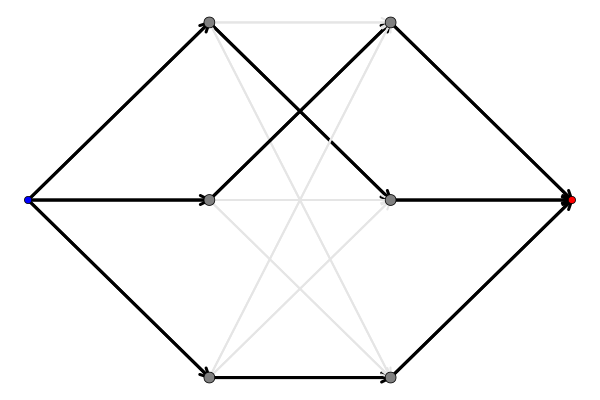

In [7]:
let
    # setup coordinates for the nodes -
    node_coordinates = [
    
        10.0 10.0 ; # 1 source node s 
        
        # people nodes -
        11.0 11.0 ; # 2 people node 
        11.0 10.0 ; # 3 people node
        11.0 9.0 ; # 4 people node
    
        # job nodes -
        12.0 11.0 ; # 5 job node 
        12.0 10.0 ; # 6 job node
        12.0 9.0 ; # 7 job node
    
        # sink node -
        13.0 10; # 8 sink node t 
    ];
    q = plot();
    for (k,v) ∈ base_graphmodel.edgesinverse

        # get the flow value from the solution for this edge index -
        flow_value = base_flow[k];
        
        # now, get the source,target node index for this edge
        s = v[1];
        t = v[2];

        # plot -
        if (flow_value != 0.0)
            plot!([node_coordinates[s,1], node_coordinates[t,1]],[node_coordinates[s,2], node_coordinates[t,2]], arrow=true, color=:black, lw=3, label="")
        else
            plot!([node_coordinates[s,1], node_coordinates[t,1]],[node_coordinates[s,2], node_coordinates[t,2]], arrow=true, color=:gray90, lw=2, label="")
        end
    end
    scatter!([node_coordinates[1,1]], [node_coordinates[1,2]], axis=nothing, border=:none, label="", c=:blue,ms=4)
    scatter!(node_coordinates[2:end-1,1], node_coordinates[2:end-1,2], axis=nothing, border=:none, label="", c=:gray, ms=6)
    scatter!([node_coordinates[end,1]], [node_coordinates[end,2]], axis=nothing, border=:none, label="", c=:red, ms=4)
    current()
end

## Solve the `unbalanced` primal problem: match $n$ people to $m$ jobs where $n<m$.
The unbalanced problem is a scenario where we aim to minimize the overall cost of matching people to jobs despite the number of people and jobs being different. To illustrate, let's consider a situation where we have more jobs than people. Like the balanced case, we load the edgefile using the `readedgesfile(...)` function, which takes the `path_to_edge_file` variable as an argument and returns a dictionary of edges. In this case, we pass in the `unbalanced_edgefile` file.
* We use the [Julia |> operator](https://docs.julialang.org/en/v1/base/base/#Base.:|%3E) to pass the edge dictionary (as the temporary variable name `edges`) to a `build(...)`, which constructs and `MySimpleDirectedGraphModel` from the edge dictionary. We save the graph model corresponding to the unbalanced graph ($n<m$) in the `unbalanced_graphmodel` variable.

In [8]:
unbalanced_graphmodel = readedgesfile(unbalanced_edgefile) |> edges -> build(MySimpleDirectedGraphModel, edges); # ooooh yeah. Nice.

In [9]:
unbalanced_graphmodel.edges

Dict{Tuple{Int64, Int64}, Tuple{Float64, Float64, Float64}} with 19 entries:
  (4, 5) => (1.0, 0.0, 1.0)
  (1, 2) => (0.0, 0.0, 2.0)
  (3, 7) => (1.0, 0.0, 1.0)
  (2, 5) => (100.0, 0.0, 1.0)
  (1, 3) => (0.0, 0.0, 1.0)
  (4, 6) => (1.0, 0.0, 1.0)
  (5, 9) => (0.0, 1.0, 1.0)
  (1, 4) => (0.0, 0.0, 1.0)
  (2, 6) => (1.0, 0.0, 1.0)
  (3, 8) => (1.0, 0.0, 1.0)
  (8, 9) => (0.0, 1.0, 1.0)
  (4, 7) => (1.0, 0.0, 1.0)
  (2, 7) => (1.0, 0.0, 1.0)
  (6, 9) => (0.0, 1.0, 1.0)
  (4, 8) => (1.0, 0.0, 1.0)
  (2, 8) => (1.0, 0.0, 1.0)
  (3, 5) => (1.0, 0.0, 1.0)
  (7, 9) => (0.0, 1.0, 1.0)
  (3, 6) => (1.0, 0.0, 1.0)

Now that we have the `unbalanced_graphmodel`, we can pass this model to the `solve` function and the number of required jobs (as a `Float64`) as the second argument. The `solve` method returns a dictionary holding data associated with the problem, where the optimal flow can be obtained from the `argmin` key, i.e., `unbalanced_solution["argmin"]`.

In [10]:
unbalanced_solution = solve(unbalanced_graphmodel, 4.0); # hmmm. why is this 4? why not 6, 12, -1???

In [11]:
unbalanced_flow = unbalanced_solution["argmin"] # we have a 2?

19-element Vector{Float64}:
 2.0
 1.0
 1.0
 0.0
 1.0
 1.0
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 1.0
 1.0
 1.0
 1.0

### Visualize the unbalanced assignment
`Unhide` the code block below to see how we plotted the solution to the unbalanced assignment problem.

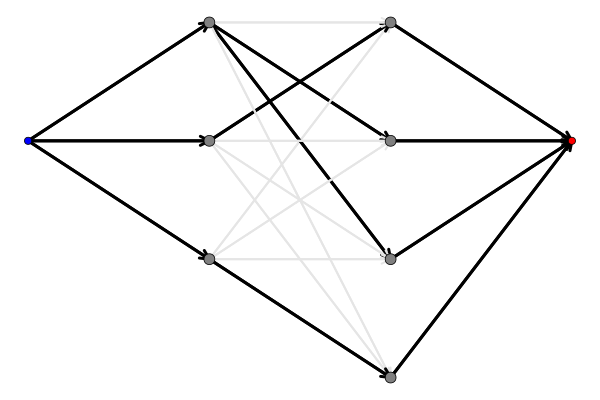

In [12]:
let
    # setup coordinates for the nodes -
    node_coordinates = [
    
        10.0 10.0 ; # 1 source node s 
        
        # people nodes -
        11.0 11.0 ; # 2 people node 
        11.0 10.0 ; # 3 people node
        11.0 9.0 ; # 4 people node
    
        # job nodes -
        12.0 11.0 ; # 5 job node 
        12.0 10.0 ; # 6 job node
        12.0 9.0 ; # 7 job node
        12.0 8.0 ; # 8 job node
    
        # sink node -
        13.0 10; # 9 sink node t 
    ];
    q = plot();
    for (k,v) ∈ unbalanced_graphmodel.edgesinverse

        # get the flow value from the solution for this edge index -
        flow_value = unbalanced_flow[k];
        
        # now, get the source,target node index for this edge
        s = v[1];
        t = v[2];

        # plot -
        if (flow_value != 0.0)
            plot!([node_coordinates[s,1], node_coordinates[t,1]],[node_coordinates[s,2], node_coordinates[t,2]], arrow=true, color=:black, lw=3, label="")
        else
            plot!([node_coordinates[s,1], node_coordinates[t,1]],[node_coordinates[s,2], node_coordinates[t,2]], arrow=true, color=:gray90, lw=2, label="")
        end
    end
    scatter!([node_coordinates[1,1]], [node_coordinates[1,2]], axis=nothing, border=:none, label="", c=:blue,ms=4)
    scatter!(node_coordinates[2:end-1,1], node_coordinates[2:end-1,2], axis=nothing, border=:none, label="", c=:gray, ms=6)
    scatter!([node_coordinates[end,1]], [node_coordinates[end,2]], axis=nothing, border=:none, label="", c=:red, ms=4)
    current()
end